In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [2]:
def plot_confusion_matrix(actual, predicted, labels, ds_type):
  cm = tf.math.confusion_matrix(actual, predicted)
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(12, 12)})
  sns.set(font_scale=1.4)
  ax.set_title('Confusion matrix of action recognition for ' + ds_type)
  ax.set_xlabel('Predicted Action')
  ax.set_ylabel('Actual Action')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

In [3]:
imsize=128
seed=4
tf.config.experimental.enable_op_determinism()
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)
tf.keras.initializers.GlorotNormal(seed)

model_folder='Model/Fe_Fi_NM'

In [4]:
#Loading augmented data generated by datagen_fe_vs_fi.ipynb
train_test_split_dir='Data_Preprocessing/data_train_test_split/Fe_Fi_NM'
trainX=np.load(train_test_split_dir+'/trainX.npy')
trainY=np.load(train_test_split_dir+'/trainY.npy')
testX =np.load(train_test_split_dir+'/testX.npy')
testY =np.load(train_test_split_dir+'/testY.npy')

In [5]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding="same", input_shape=(imsize, imsize, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.BatchNormalization())

# model.add(tf.keras.layers.Dense(3, activation='sigmoid'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.summary()

d:\projects\cnn-mp-dos\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,475 (314.36 KB)

 Trainable params: 80,299 (313.67 KB)

 Non-trainable params: 176 (704.00 B)

In [ ]:
model_filename = model_folder+'/CNN_Multiclass_F_Fi_NM_{epoch}.keras'

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = model_filename,
    monitor='val_loss',
    verbose=0,


    
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    save_freq='epoch',
    initial_value_threshold=None
)

In [7]:
model.compile(optimizer = "Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
history = model.fit(trainX,trainY, epochs=50, validation_data=(testX,testY), callbacks=[model_checkpoint])

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 173ms/step - accuracy: 0.5990 - loss: 0.8515 - val_accuracy: 0.3337 - val_loss: 1.3071
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 170ms/step - accuracy: 0.7249 - loss: 0.5808 - val_accuracy: 0.3337 - val_loss: 1.4971
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - accuracy: 0.8053 - loss: 0.4520 - val_accuracy: 0.3337 - val_loss: 1.3277
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 0.8430 - loss: 0.3633 - val_accuracy: 0.4004 - val_loss: 1.1755
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 170ms/step - accuracy: 0.8875 - loss: 0.2827 - val_accuracy: 0.7812 - val_loss: 0.5327
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 168ms/step - accuracy: 0.9110 - loss: 0.2160 - val_accuracy: 0.8410 - val_loss: 0.4112
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 168ms/step - accuracy: 0.9208 - loss: 0.1862 - val_accuracy: 0.8469 - val_loss: 0.3499
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - accuracy: 0.9544 - loss: 0.1334 - val_accu

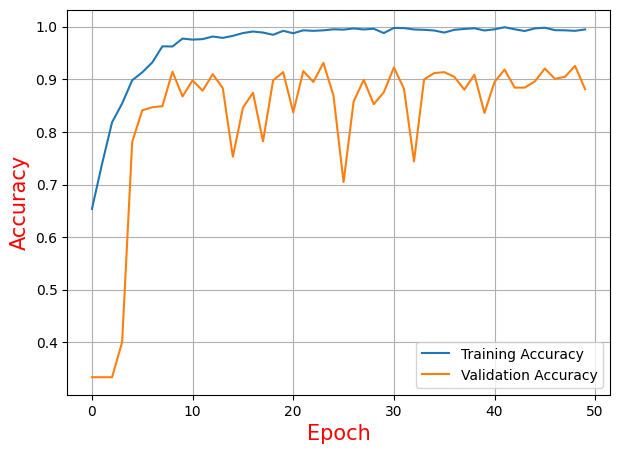

In [9]:
plt.subplots(figsize=(7, 5));
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.ylabel('Accuracy', color='red', fontsize = 15);
plt.xlabel('Epoch', color='red', fontsize = 15);
plt.legend(['Training Accuracy', 'Validation Accuracy']);
plt.grid()

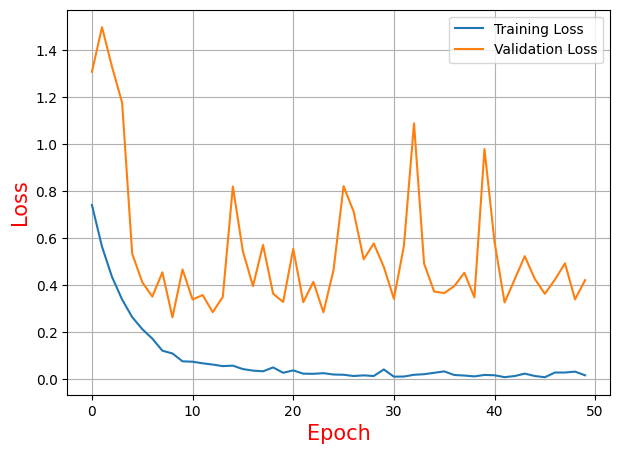

In [10]:
plt.subplots(figsize=(7, 5));
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.ylabel('Loss', color='red', fontsize = 15);
plt.xlabel('Epoch', color='red', fontsize = 15);
plt.legend(['Training Loss', 'Validation Loss']);
plt.grid()

**MODEL EVALUATION**

*Selecting BEST MODEL (BEST ACCURACY)*

In [11]:
import re
model_folder='Model/Fe_Fi_NM'
LABELS=['Ferrimagnetic','Ferromagnetic', 'Non_Magnetic']
dir_list = os.listdir(model_folder)
best_epoch=-1
best_model=''
acc_max=-1
actual_class = np.argmax(testY,axis=1)
for filename in dir_list:
    model_check = tf.keras.models.load_model(model_folder+'/'+filename)
    predicted_class =np.argmax(((model_check.predict(testX) > .5).astype(int)),axis=1)
    report=classification_report(actual_class, predicted_class, target_names=LABELS,output_dict=True,zero_division=np.nan)
    if report['accuracy']>acc_max:
        best_model=model_folder+'/'+filename
        r=re.findall('[0-9]+', filename)
        best_epoch=int(r[0])
        acc_max=report['accuracy']

model_best = tf.keras.models.load_model(best_model)
predicted_class =np.argmax(((model_best.predict(testX) > .5).astype(int)),axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


*Classification Report*

In [12]:
report=classification_report(actual_class, predicted_class, target_names=LABELS)
print('Best model: ', best_model)
print('=======================================================')
print(report)

Best model:  Model/Fe_Fi_NM/CNN_Multiclass_F_Fi_NM_9.keras
               precision    recall  f1-score   support

Ferrimagnetic       0.84      0.93      0.88       302
Ferromagnetic       0.90      0.85      0.87       340
 Non_Magnetic       0.99      0.96      0.97       377

     accuracy                           0.91      1019
    macro avg       0.91      0.91      0.91      1019
 weighted avg       0.92      0.91      0.91      1019



*Confusion Matrix*

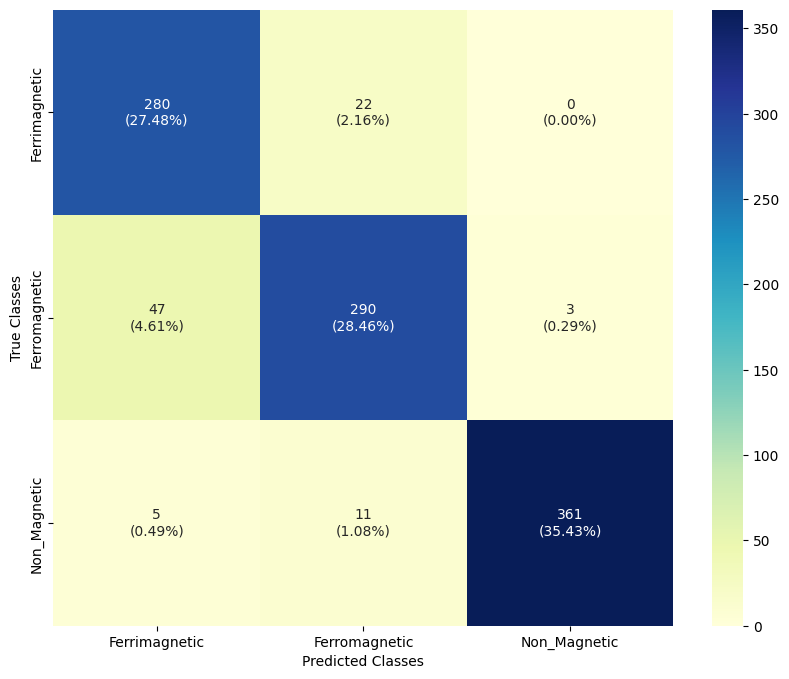

In [13]:
cf_mtx = confusion_matrix(actual_class, predicted_class)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(3,3)

plt.figure(figsize = (10, 8))
sns.heatmap(cf_mtx, xticklabels=LABELS, yticklabels=LABELS,
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

*TRAINING AND VALIDATION ACCURACY*

In [14]:
print(f'Best_epoch: {best_epoch}')
print(f"Training Acc: {history.history['accuracy'][best_epoch]}")
print(f"Validation Acc: {history.history['val_accuracy'][best_epoch]}")

print(f"Training Loss: {history.history['loss'][best_epoch]}")
print(f"Validation Loss: {history.history['val_loss'][best_epoch]}")



Best_epoch: 9
Training Acc: 0.977414071559906
Validation Acc: 0.8675171732902527
Training Loss: 0.07412359863519669
Validation Loss: 0.46548399329185486
